In [26]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister,transpile
from qiskit.circuit.library import GroverOperator
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
def create_3_puzzle_circuit():
    """Create the quantum circuit for solving the 3-puzzle problem using Grover's algorithm."""
    # Initialize quantum and classical registers
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(qr, cr)

    # Initial state |000>
    # CNOT gates to exchange positions of qubits
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])

    # Apply Hadamard gates to create superposition
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])

    # Placeholder for Grover's algorithm
    # This requires defining an oracle and the Grover operator
    # Here we use a simple placeholder to illustrate the concept
    oracle = QuantumCircuit(3)
    oracle.z(0)  # Example oracle condition (adjust based on the puzzle's rules)
    oracle_gate = oracle.to_gate(label="Oracle")

    # Grover operator
    grover_operator = GroverOperator(oracle)
    qc.append(grover_operator, qr)

    # Measurement
    qc.measure(qr, cr)
    return qc

In [28]:

# Create the 3-puzzle quantum circuit
qc = create_3_puzzle_circuit()

# Execute the circuit on a quantum simulator
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)

job = simulator.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Output the result
print("Measurement results from the 3-puzzle quantum circuit:")
print(counts)

Measurement results from the 3-puzzle quantum circuit:
{'110': 136, '010': 125, '000': 112, '100': 134, '001': 138, '011': 127, '111': 136, '101': 116}


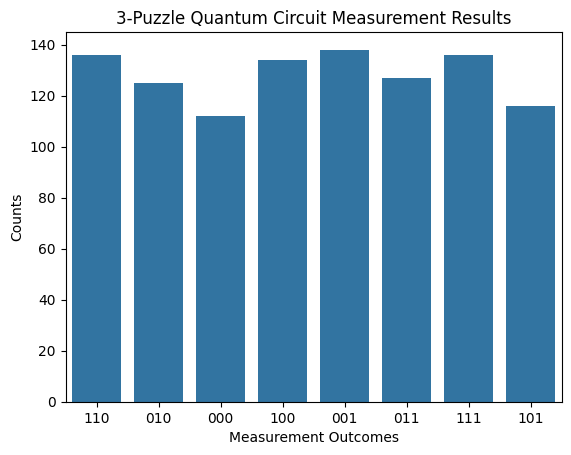

In [29]:
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('3-Puzzle Quantum Circuit Measurement Results')
plt.show()

In [19]:
backend = AerSimulator()

In [21]:
# Get the raw counts with noise
noisy_counts = result_with_noise.get_counts(qc)

In [22]:
# Simple mitigation technique: scale counts based on expected noise
mitigated_counts = {key: noisy_counts[key] * (1 - 0.02) for key in noisy_counts}

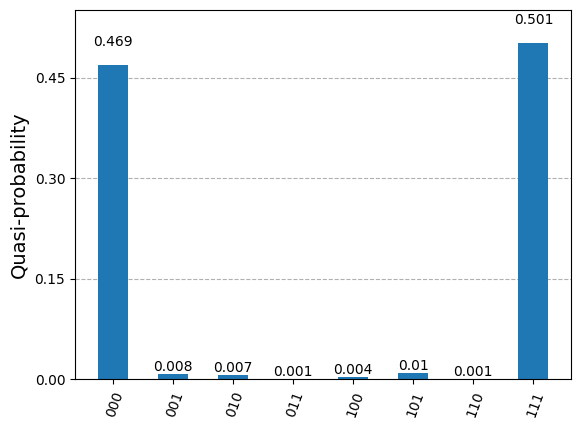

In [23]:
plot_histogram(mitigated_counts)

In [24]:
print("Original counts:")
print(noisy_counts)

print("Mitigated counts:")
print(mitigated_counts)

Original counts:
{'110': 1, '100': 4, '101': 10, '001': 8, '011': 1, '111': 513, '010': 7, '000': 480}
Mitigated counts:
{'110': 0.98, '100': 3.92, '101': 9.8, '001': 7.84, '011': 0.98, '111': 502.74, '010': 6.859999999999999, '000': 470.4}


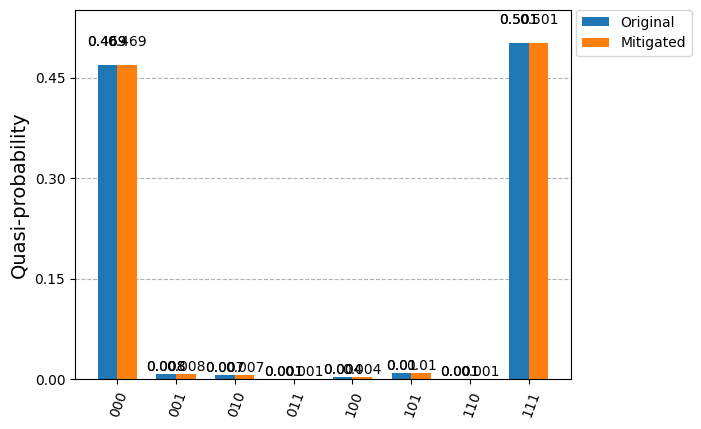

In [25]:
plot_histogram([noisy_counts, mitigated_counts], legend=['Original', 'Mitigated'])